# Trabalho de AM2

- https://www.kaggle.com/datasets/ishikajohari/best-books-10k-multi-genre-data




## Bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import re
import string
import random
import warnings
warnings.simplefilter('ignore')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.graph_objects as go
%matplotlib inline
import io

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from  PIL import Image
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from wordcloud import WordCloud

In [ ]:
!pip install -U scikit-learn==0.24.1
!pip install scikit-multilearn

  Using cached scikit-learn-0.24.1.tar.gz (7.4 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for scikit-learn (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for scikit-learn
Failed to build scikit-learn
ERROR: Could not build wheels for scikit-learn, which is required to install pyproject.toml-based projects
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 3.0 MB/s eta 0:00:00


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from skmultilearn.adapt import MLkNN

from sklearn.multiclass import OneVsRestClassifier
import sklearn.metrics as metrics

## Importando o arquivo

In [ ]:
from google.colab import files
importado = files.upload()

Saving goodreads_data.csv to goodreads_data.csv


In [ ]:
# Carrega o .csv, aqui tem que colocar o nome

arquivo = 'goodreads_data.csv'
data = pd.read_csv(io.BytesIO(importado[arquivo]))

In [ ]:
data.head()

Unnamed: 0                                               Book  \
0           0                              To Kill a Mockingbird   
1           1  Harry Potter and the Philosopher’s Stone (Harr...   
2           2                                Pride and Prejudice   
3           3                          The Diary of a Young Girl   
4           4                                        Animal Farm   

          Author                                        Description  \
0     Harper Lee  The unforgettable novel of a childhood in a sl...   
1   J.K. Rowling  Harry Potter thinks he is an ordinary boy - un...   
2    Jane Austen  Since its immediate success in 1813, Pride and...   
3     Anne Frank  Discovered in the attic in which she spent the...   
4  George Orwell  Librarian's note: There is an Alternate Cover ...   

                                              Genres  Avg_Rating Num_Ratings  \
0  ['Classics', 'Fiction', 'Historical Fiction', ...        4.27   5,691,311   
1  ['Fantasy', 'Fiction', 'Young Adult', 'Magic',...        4.47   9,278,135   
2  ['Classics', 'Fiction', 'Romance', 'Historical...        4.28   3,944,155   
3  ['Classics', 'Nonfiction', 'History', 'Biograp...        4.18   3,488,438   
4  ['Classics', 'Fiction', 'Dystopia', 'Fantasy',...        3.98   3,575,172   

                                                 URL  
0  https://www.goodreads.com/book/show/2657.To_Ki...  
1  https://www.goodreads.com/book/show/72193.Harr...  
2  https://www.goodreads.com/book/show/1885.Pride...  
3  https://www.goodreads.com/book/show/48855.The_...  
4  https://www.goodreads.com/book/show/170448.Ani...

In [ ]:
# Colocar o número de Classes e Features

max_labels = 25
max_feat = 100000

## Verificar os dados

In [ ]:
# Informações dos dataset

"""
Book - Name of the book. Soemtimes this includes the details of the Series it belongs to inside a parenthesis. This information can be further extracted to analyse only series.
Author - Name of the book's Author
Description - The book's description as mentioned on Goodreads
Genres - Multiple Genres as classified on Goodreads. Could be useful for Multi-label classification or Content based recommendation and Clustering.
Average Rating - The average rating (Out of 5) given on Goodreads
Number of Ratings - The Number of users that have Ratings. (Not to be confused with reviews)
URL - The Goodreads URL for the book's details' page

"""

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   10000 non-null  int64  
 1   Book         10000 non-null  object 
 2   Author       10000 non-null  object 
 3   Description  9923 non-null   object 
 4   Genres       10000 non-null  object 
 5   Avg_Rating   10000 non-null  float64
 6   Num_Ratings  10000 non-null  object 
 7   URL          10000 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 625.1+ KB


In [ ]:
# Atributos faltantes
data.isna().sum()

Unnamed: 0      0
Book            0
Author          0
Description    77
Genres          0
Avg_Rating      0
Num_Ratings     0
URL             0
dtype: int64

In [ ]:
# Verificar duplicatas
data.duplicated().sum()

0

In [ ]:
# Informações dos dataset

data.describe()

Unnamed: 0    Avg_Rating
count  10000.00000  10000.000000
mean    4999.50000      4.068577
std     2886.89568      0.335359
min        0.00000      0.000000
25%     2499.75000      3.880000
50%     4999.50000      4.080000
75%     7499.25000      4.260000
max     9999.00000      5.000000

In [ ]:
# Copiar o data

df = pd.DataFrame(data)


In [ ]:
# Remover a coluna 'URL'
df = df.drop('URL', axis=1)


# Remover as linhas com valores ausentes
df = df.dropna()


In [ ]:
# Atributos faltantes

df.isna().sum()

Unnamed: 0     0
Book           0
Author         0
Description    0
Genres         0
Avg_Rating     0
Num_Ratings    0
dtype: int64

In [ ]:
dfvisu = df

## Visualização dos dados

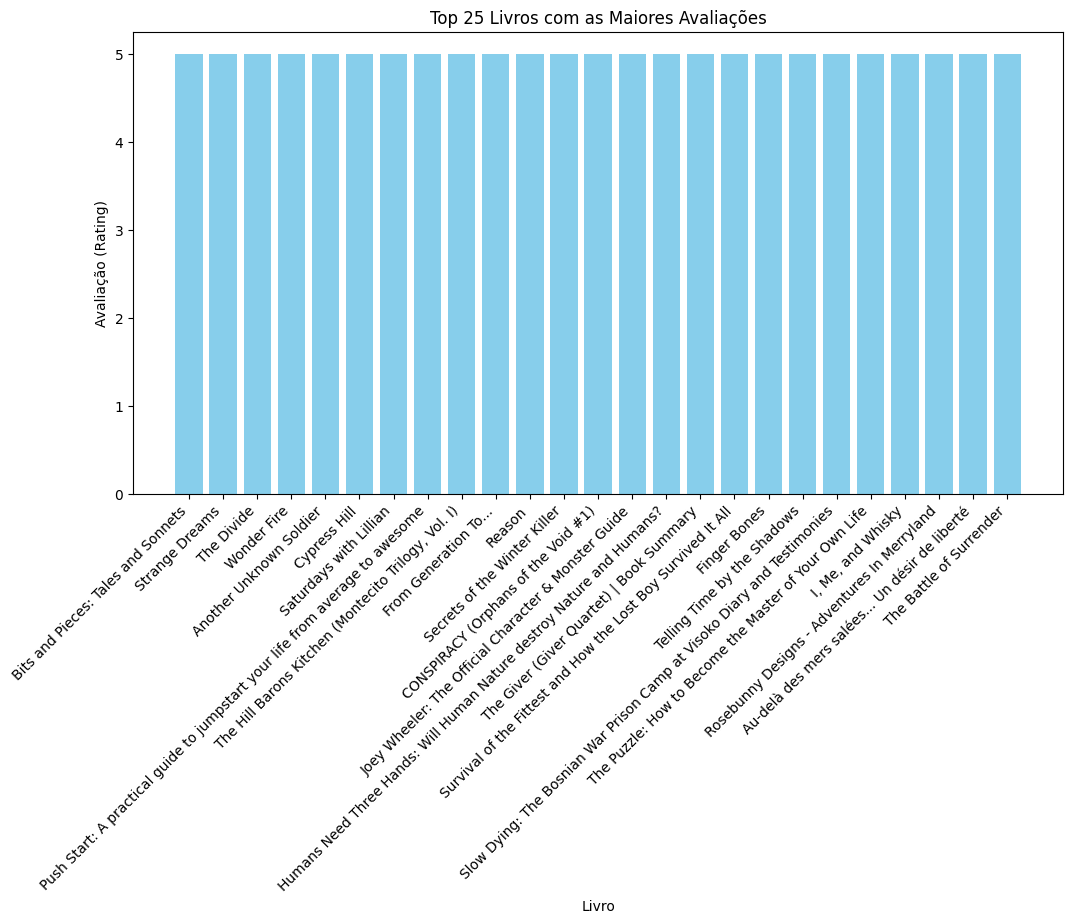

In [ ]:
# Ordenar o DataFrame pelas maiores avaliações (Ratings)
df_sorted = df.sort_values(by='Avg_Rating', ascending=False).head(25)

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(df_sorted['Book'], df_sorted['Avg_Rating'], color='skyblue')
plt.title('Top 25 Livros com as Maiores Avaliações')
plt.xlabel('Livro')
plt.ylabel('Avaliação (Rating)')
plt.xticks(rotation=45, ha='right')
plt.show()

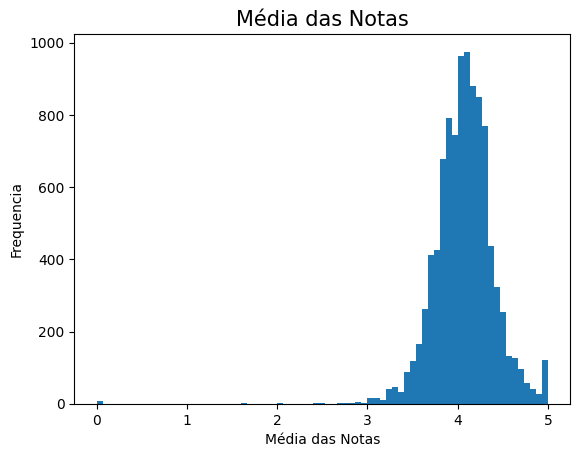

In [ ]:
# Média das Notas
plt.hist(df['Avg_Rating'], bins=75)

plt.title('Média das Notas', fontsize=15)

plt.xlabel('Média das Notas')
plt.ylabel('Frequencia')

plt.show()

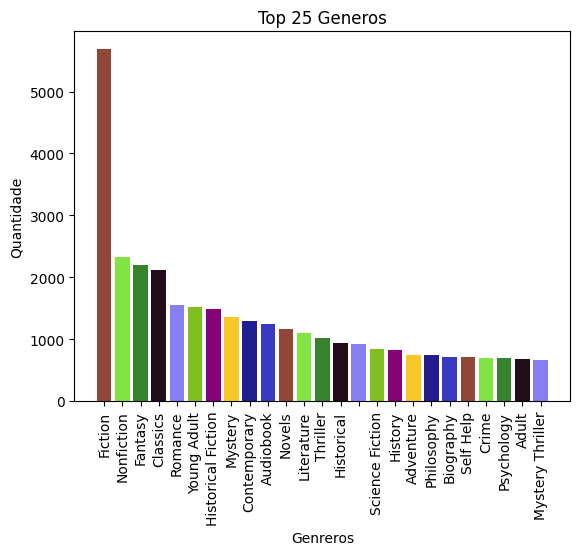

In [ ]:
# Criar uma lista com todos os generos

genres_list = [genre.strip("[]").replace("'", "").split(", ") for genre in df['Genres']]
all_genres = [genre for sublist in genres_list for genre in sublist]

# Depois Disso, Fazer a frequencia

from collections import Counter
genre_counts = Counter(all_genres)

# Criar um Gráfico para Mostrar

top_genres = dict(genre_counts.most_common(max_labels))
colors = np.random.rand(10, 3)

plt.bar(top_genres.keys(), top_genres.values(), color=colors)

plt.xticks(rotation=90)

plt.xlabel('Genreros')

plt.ylabel('Quantidade')
plt.title('Top 25 Generos')

plt.show()

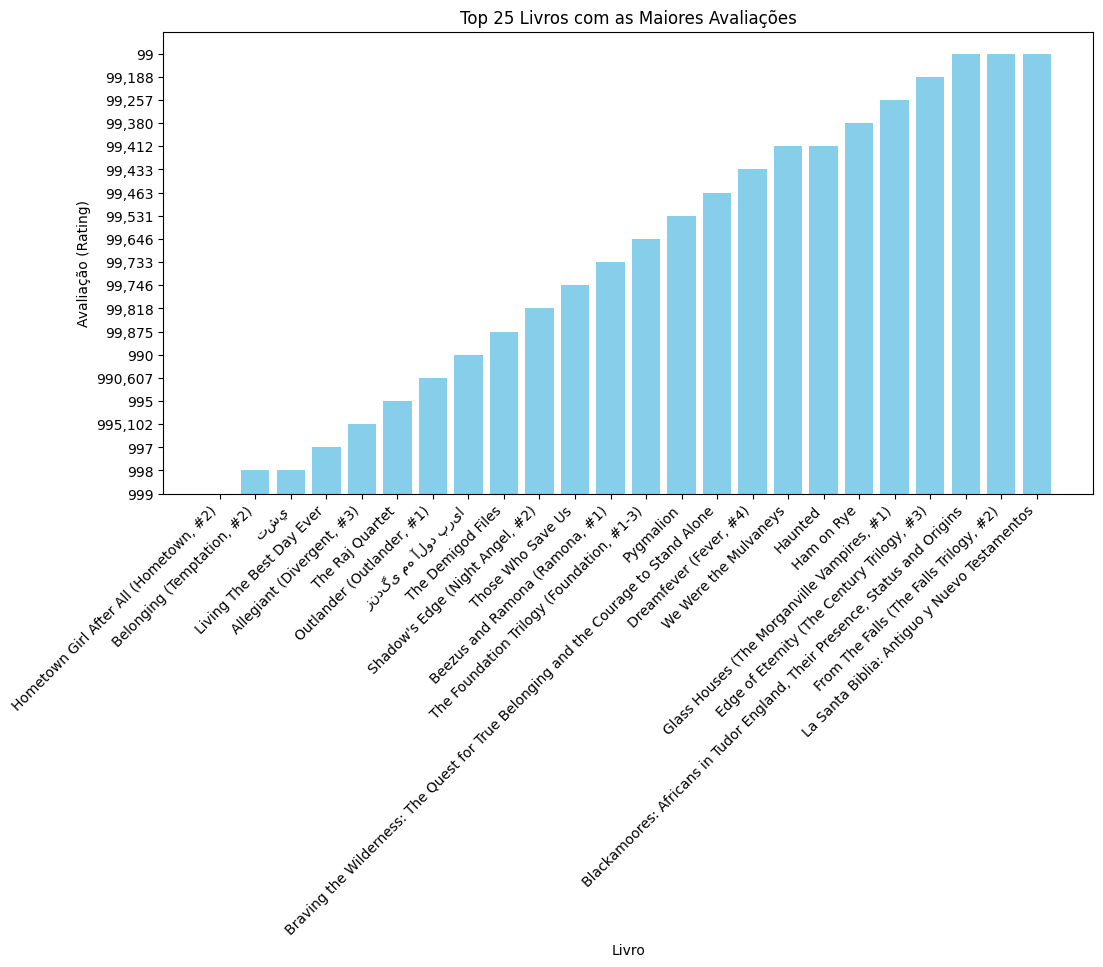

In [ ]:
# Ordenar o DataFrame pelas maiores avaliações (Ratings)
df_sorted = df.sort_values(by='Num_Ratings', ascending=False).head(25)

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(df_sorted['Book'], df_sorted['Num_Ratings'], color='skyblue')
plt.title('Top 25 Livros com as Maiores Número de Avaliações')
plt.xlabel('Livro')
plt.ylabel('Avaliação (Rating)')
plt.xticks(rotation=45, ha='right')
plt.show()

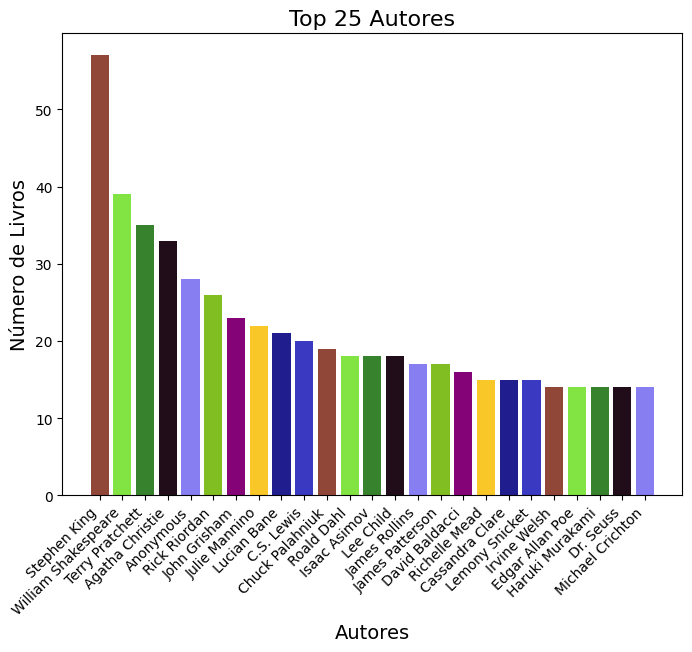

In [ ]:
# Agrupar pela frequencia de Autores

top_authors = df.groupby('Author').size().sort_values(ascending=False).head(25)

# Criar o Gráfico para os melhores

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(top_authors.index, top_authors.values, color=colors)

ax.set_title('Top 25 Autores', fontsize=16)
ax.set_xlabel('Autores', fontsize=14)
ax.set_ylabel('Número de Livros', fontsize=14)

plt.xticks(rotation=45, ha='right')

plt.show()

In [ ]:
# Quantas features poderiam ser usadas ?

text = " ".join(describe for describe in df.Description).lower()
print ("Há {} palavras em todas as Descriçoes".format(len(text)))

Há 9497677 palavras em todas as Descriçoes


In [ ]:
# Uso do NLTK

nltk.download('stopwords')
stemmer = SnowballStemmer('english')
stopwords = set(stopwords.words('english'))
stopwords.update(["book", "books", "author", "u", "s", "story", "stories", "read", "reading"])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


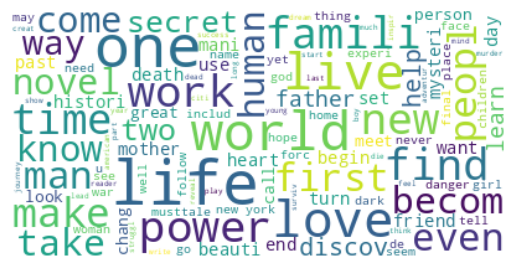

In [ ]:
# Aqui é para Fazer das Descrições

text = text.translate(str.maketrans('', '', string.punctuation))
words = text.split()
words = [word for word in words if word not in stopwords]
words = [stemmer.stem(word) for word in words]

# Aqui é para fazer plotar as palavras
wordcloud = WordCloud(background_color='white', max_words=1000, max_font_size=50).generate(' '.join(words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

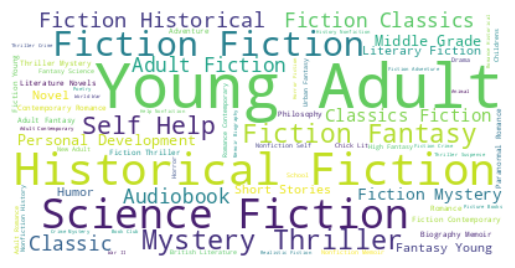

In [ ]:
# Aqui é para fazer plotar as palavras
wordcloud_g = WordCloud(background_color='white', max_words=617, max_font_size=50).generate(' '.join(all_genres))
plt.imshow(wordcloud_g, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
"""
Uma das visualizações que achamos bem interessante foi a do livro

https://www.kaggle.com/code/kpperez/visualizations-and-wordclouds/notebook

Créditos a pessoa, contudo ela não disponibilizou a Mascará

"""

'\nUma das visualizações que achamos bem interessante foi a do livro\n\nhttps://www.kaggle.com/code/kpperez/visualizations-and-wordclouds/notebook\n\nCréditos a pessoa, contudo ela não disponibilizou a Mascará\n\n'

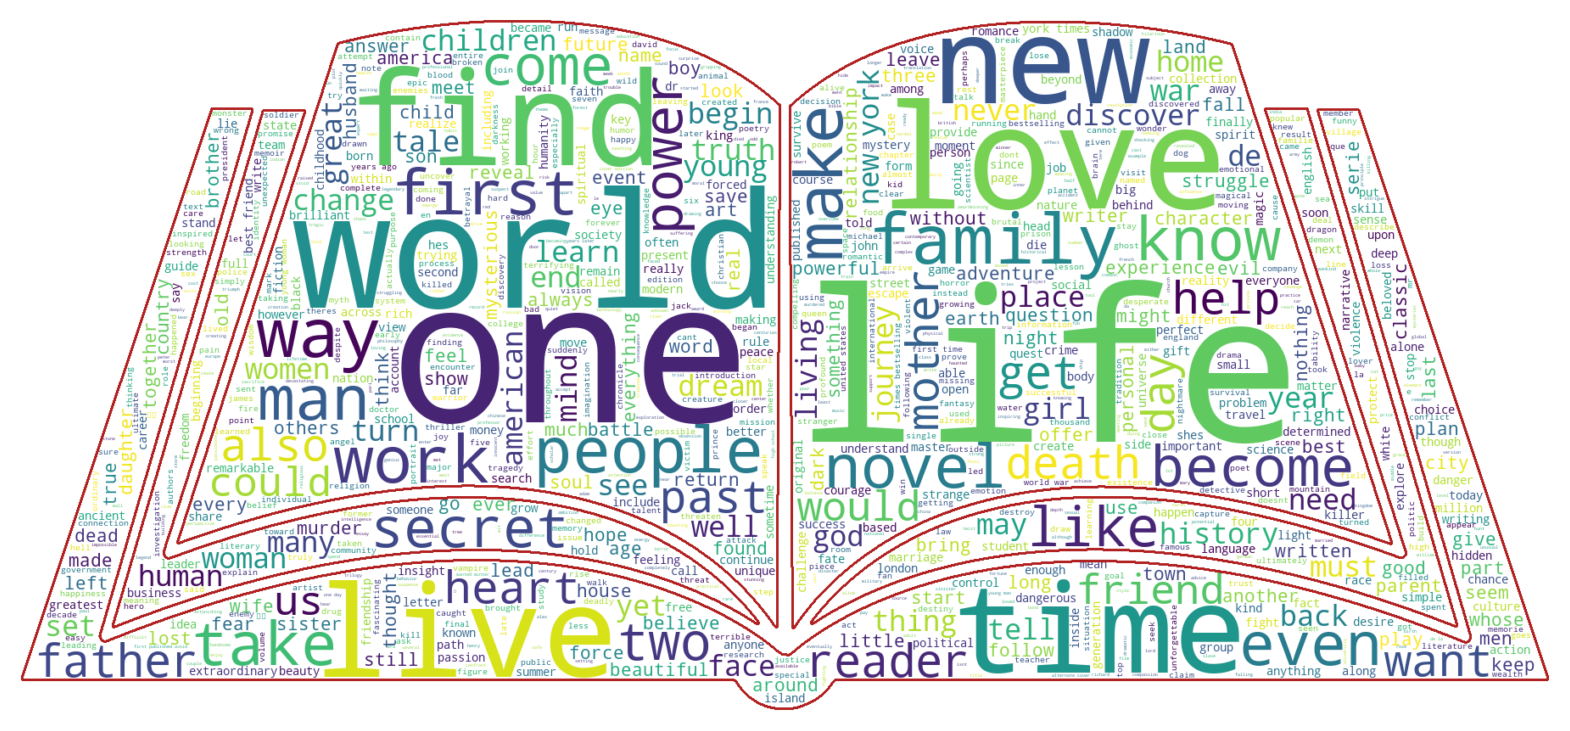

## Preprocessamento

In [ ]:
# Extraindo a primeira linha da coluna 'Genres'
primeira_linha_genres = df['Genres'].iloc[0]

# Verificando o tipo de dado
type(primeira_linha_genres)

str

In [ ]:
import ast

In [ ]:
df['Genres'] =  df['Genres'].apply(lambda x: ast.literal_eval(x))

In [ ]:
# Extraindo a primeira linha da coluna 'Genres'
primeira_linha_genres = df['Genres'].iloc[0]

# Verificando o tipo de dado
type(primeira_linha_genres)

list

In [ ]:
y = df["Genres"]
y

0       [Classics, Fiction, Historical Fiction, School...
1       [Fantasy, Fiction, Young Adult, Magic, Childre...
2       [Classics, Fiction, Romance, Historical Fictio...
3       [Classics, Nonfiction, History, Biography, Mem...
4       [Classics, Fiction, Dystopia, Fantasy, Politic...
                              ...                        
9995    [Dystopia, Science Fiction, Post Apocalyptic, ...
9996                                                   []
9997           [Fiction, Horror, Dystopia, Coming Of Age]
9998    [New Adult, Romance, Contemporary Romance, Con...
9999                                                   []
Name: Genres, Length: 9923, dtype: object

In [ ]:
multilabel = MultiLabelBinarizer()

In [ ]:
y = multilabel.fit_transform(df["Genres"])

In [ ]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
len(y)

9923

In [ ]:
len(y[0])

617

In [ ]:
multilabel.classes_

array(['12th Century', '15th Century', '16th Century', '17th Century',
       '18th Century', '19th Century', '20th Century', '21st Century',
       'Abuse', 'Academia', 'Academic', 'Action', 'Activism', 'Adhd',
       'Adoption', 'Adult', 'Adult Fiction', 'Adventure', 'Africa',
       'African American', 'African American Literature',
       'African Literature', 'Agriculture', 'Alchemy', 'Algeria',
       'Aliens', 'Alternate History', 'Alternate Universe', 'Amazon',
       'American', 'American Civil War', 'American History',
       'American Revolution', 'American Revolutionary War', 'Americana',
       'Amish', 'Anarchism', 'Ancient', 'Ancient History', 'Angels',
       'Animal Fiction', 'Animals', 'Anthologies', 'Anthropology',
       'Anti Racist', 'Apocalyptic', 'Archaeology', 'Architecture', 'Art',
       'Art Design', 'Art History', 'Arthurian',
       'Artificial Intelligence', 'Asexual', 'Asia', 'Asian Literature',
       'Astrology', 'Astronomy', 'Atheism', 'Audiobook', 'A

## Diminuir a Quantidade de Classes

Outra abordagem seria perceber que há certos problemas que foram evidenciados: Ao utilizar Binarizer, ele cria MUITAS dimensões, o que pode deixar o problema cada vez mais complexo

In [ ]:


# Transformar a coluna de listas em uma lista de todos os rótulos
all_labels = [label for sublist in df['Genres'] for label in sublist]

# Calcular a frequência dos rótulos
label_counts = pd.Series(all_labels).value_counts()

# Escolher os N rótulos mais frequentes
top_labels = label_counts.head(max_labels).index

# Manter apenas os rótulos selecionados em cada lista
df['Genres'] = df['Genres'].apply(lambda x: [label for label in x if label in top_labels])

# Criar as variáveis binárias
mlb = MultiLabelBinarizer()
binary_labels = pd.DataFrame(mlb.fit_transform(df['Genres']), columns=mlb.classes_, index=df.index)

# Concatenar as variáveis binárias ao DataFrame original
df = pd.concat([df, binary_labels], axis=1)

# Remover a coluna original 'Genres'
df = df.drop('Genres', axis=1)

# Exibir o DataFrame resultante
print(df)

      Unnamed: 0                                               Book  \
0              0                              To Kill a Mockingbird   
1              1  Harry Potter and the Philosopher’s Stone (Harr...   
2              2                                Pride and Prejudice   
3              3                          The Diary of a Young Girl   
4              4                                        Animal Farm   
...          ...                                                ...   
9995        9995                    Breeders (Breeders Trilogy, #1)   
9996        9996                                             Dynamo   
9997        9997                              The Republic of Trees   
9998        9998                     Waking Up (Healing Hearts, #1)   
9999        9999                 Bits and Pieces: Tales and Sonnets   

                 Author                                        Description  \
0            Harper Lee  The unforgettable novel of a childhood in a 

## PLN

Tokenização:

O TfidfVectorizer primeiro divide cada documento em palavras ou termos individuais, um processo conhecido como tokenização.
Contagem de Frequência:

Em seguida, ele calcula a frequência de cada termo em cada documento, chamada de Term Frequency (TF). A fórmula geral para TF é o número de vezes que um termo aparece em um documento dividido pelo número total de termos no documento.
Inverse Document Frequency (IDF):

O IDF é um fator que penaliza termos que aparecem em muitos documentos. A fórmula geral para IDF é o logaritmo do número total de documentos dividido pelo número de documentos que contêm o termo. Isso ajuda a dar mais peso a termos raros que podem ser mais informativos.
TF-IDF Ponderado:

O TF-IDF é calculado multiplicando-se a Term Frequency (TF) pelo Inverse Document Frequency (IDF) para cada termo em cada documento.
Matriz Resultante:

O resultado é uma matriz em que cada linha representa um documento, cada coluna representa um termo e cada valor na matriz é o peso TF-IDF desse termo no documento correspondente.

### Max Feature

ele controla o número máximo de recursos (termos ou palavras) a serem considerados durante a vetorização TF-IDF. Esse parâmetro é frequentemente utilizado para limitar o tamanho do vocabulário e, assim, reduzir a dimensionalidade da matriz resultante.

In [113]:
tfidf = TfidfVectorizer(analyzer='word', max_features = max_feat) #Word é o padrão

X = tfidf.fit_transform(df["Description"])

In [107]:
X

<9923x70368 sparse matrix of type '<class 'numpy.float64'>'
	with 1039413 stored elements in Compressed Sparse Row format>

In [96]:
tfidf.vocabulary_

{'unforgettable': 58641,
 'novel': 39071,
 'childhood': 10361,
 'sleepy': 51698,
 'southern': 52461,
 'town': 56994,
 'crisis': 13337,
 'conscience': 12176,
 'rocked': 48055,
 'it': 29423,
 'kill': 30967,
 'mockingbird': 36620,
 'became': 6068,
 'both': 7697,
 'instant': 28651,
 'bestseller': 6601,
 'critical': 13358,
 'success': 54073,
 'when': 61381,
 'first': 21355,
 'published': 44798,
 '1960': 487,
 'went': 61270,
 'win': 61678,
 'pulitzer': 44848,
 'prize': 44130,
 '1961': 489,
 'later': 32018,
 'made': 33943,
 'into': 28983,
 'academy': 1382,
 'award': 5107,
 'winning': 61745,
 'film': 21188,
 'also': 2735,
 'classic': 10840,
 'compassionate': 11673,
 'dramatic': 16894,
 'deeply': 14597,
 'moving': 37254,
 'takes': 55112,
 'readers': 45907,
 'roots': 48239,
 'human': 26915,
 'behavior': 6209,
 'innocence': 28495,
 'experience': 20044,
 'kindness': 31026,
 'cruelty': 13486,
 'love': 33440,
 'hatred': 25439,
 'humor': 26974,
 'pathos': 41414,
 'now': 39108,
 'over': 40507,
 '18': 

In [85]:
X.shape, binary_labels.shape

((9923, 70368), (9923, 25))

## Treinamento

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, binary_labels, test_size = 0.2, random_state = 22)

## Construir o Modelo + Avaliação

Jaccard -
O índice de Jaccard, ou coeficiente de Jaccard, é uma medida de similaridade entre dois conjuntos. Ele é definido como o tamanho da interseção dividido pelo tamanho da união dos conjuntos. O índice de Jaccard é frequentemente usado em mineração de dados, recuperação de informação, aprendizado de máquina e outras áreas para comparar a similaridade entre dois conjuntos.

O índice de Jaccard varia de 0 a 1, sendo 0 indicativo de conjuntos totalmente distintos (sem elementos em comum) e 1 indicativo de conjuntos idênticos (todos os elementos em comum). Valores intermediários indicam graus de sobreposição ou similaridade.

Hamming Loss
A métrica de perda de Hamming (Hamming Loss) é uma métrica de avaliação para problemas de classificação multirrótulo (multi-label). Ela mede a fração de rótulos incorretamente previstos para uma amostra. Esta métrica é útil quando cada instância de dados pode pertencer a múltiplas classes simultaneamente.

A perda de Hamming é uma medida de erro que considera a discrepância entre os rótulos reais e os rótulos previstos, levando em conta a sobreposição de rótulos permitida pelo problema de classificação multirrótulo. Quanto menor o valor da perda de Hamming, melhor o desempenho do modelo.

Acurácia -

A acurácia é uma métrica de avaliação comum para problemas de classificação. Ela mede a proporção de previsões corretas em relação ao total de previsões.

Essa métrica é geralmente expressa como um valor entre 0 e 1, onde 1 indica uma acurácia perfeita (todas as previsões corretas) e 0 indica uma acurácia nula (nenhuma previsão correta).

In [87]:
sgd = SGDClassifier()

"""
O SGDClassifier em particular é um classificador linear que utiliza
o método do gradiente descendente estocástico para otimização.
Ele é adequado para problemas de classificação binária e multiclasse.
"""

lr = LogisticRegression(solver = 'lbfgs')
"""

Regressão Logística:

A regressão logística é um modelo de aprendizado de máquina utilizado para problemas de classificação binária. Ele estima a probabilidade de uma instância pertencer a uma determinada classe.
Solver ('lbfgs'):

O solver ('solucionador') é o algoritmo utilizado pelo modelo para otimizar os parâmetros durante o treinamento.
O 'lbfgs' (Limited-memory Broyden-Fletcher-Goldfarb-Shanno) é um otimizador que pertence à família dos métodos quasi-Newton e é especialmente adequado para problemas de otimização com muitas variáveis.

O 'lbfgs' é uma escolha comum para problemas de otimização em regressão logística. Ele é eficiente em termos computacionais e pode lidar bem com conjuntos de dados grandes.


"""

svc = LinearSVC()

"""
Linearidade:

O LinearSVC assume que as classes podem ser separadas por um hiperplano linear no espaço de características.
 Isso significa que o algoritmo funciona bem quando a relação entre as características e as classes é aproximadamente linear.

Regularização:

O LinearSVC utiliza um termo de regularização, que é controlado pelo parâmetro C. A regularização ajuda a evitar o sobreajuste (overfitting) ao penalizar coeficientes grandes.
Um valor menor de C implica uma regularização mais forte.
Otimização:

Internamente, o LinearSVC utiliza o otimizador "Sequential Minimal Optimization" (SMO) para treinar o modelo. Ele tenta encontrar o hiperplano que maximiza a margem entre as classes.


"""

mlknn = MLkNN()

In [88]:
def j_score(y_true, y_pred):
  jaccard = np.minimum(y_true, y_pred).sum(axis = 1)/np.maximum(y_true, y_pred).sum(axis = 1)
  return jaccard.mean()*100

def print_score(y_pred, clf):
  print("Clf: ", clf.__class__.__name__)
  print('Jacard score: {}'.format(j_score(y_test, y_pred)))

In [89]:
# Obter os nomes de todas as colunas
nomes_colunas = binary_labels.columns

In [93]:
# Classificador SGD

classifier = sgd
clf = OneVsRestClassifier(classifier)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print_score(y_pred, classifier)
print('Hamming loss: {}'.format(metrics.hamming_loss(y_test, y_pred)))
print('Acurácia: {}'.format(metrics.accuracy_score(y_test, y_pred)))
frequencia_sgd = pd.DataFrame([[0] * len(y_test.columns)], columns=nomes_colunas)
for i in range(y_test.shape[0]):
    for j in range(y_test.shape[1]):
        valor = y_test.iloc[i, j]
        valor2 = y_pred[i][j]
        if valor != valor2:
            frequencia_sgd .iloc[0, j] += 1

Clf:  SGDClassifier
Jacard score: 41.82052207535742
Hamming loss: 0.0855617128463476
Acurácia: 0.14659949622166246


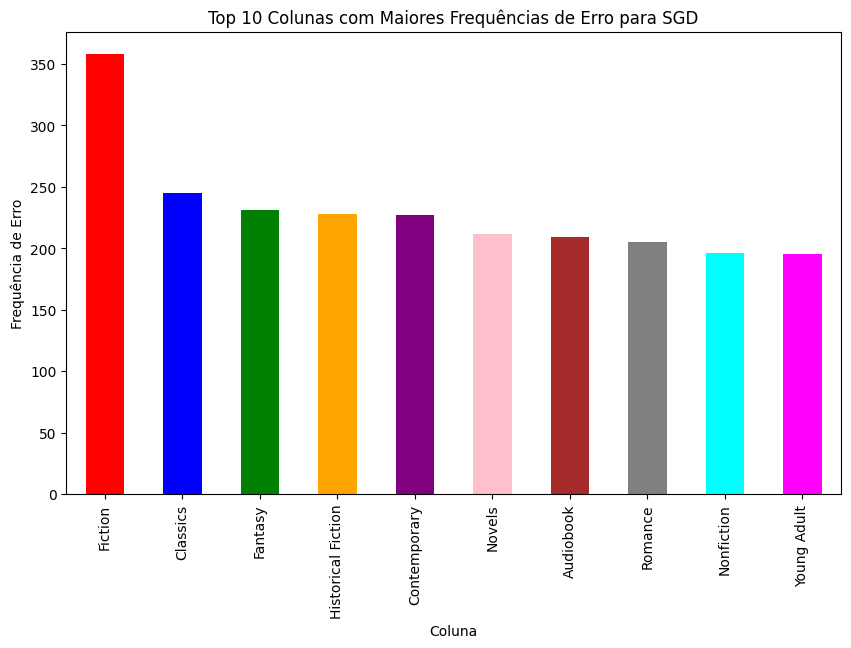

In [ ]:
# Ordenar as colunas pela frequência de erro
colunas_ordenadas = frequencia_sgd.iloc[0].sort_values(ascending=False)

# Selecionar as 10 colunas com as maiores frequências de erro
top_10_colunas = colunas_ordenadas.head(10)


# Plotar apenas as 10 maiores colunas com cores diferentes
plt.figure(figsize=(10, 6))
top_10_colunas.plot(kind='bar', color=['red', 'blue', 'green', 'orange', 'purple', 'pink', 'brown', 'gray', 'cyan', 'magenta'])
plt.title("Top 10 Colunas com Maiores Frequências de Erro para SGD")
plt.xlabel("Coluna")
plt.ylabel("Frequência de Erro")
plt.show()

In [ ]:
# Classificar LR

classifier = lr
clf = OneVsRestClassifier(classifier)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print_score(y_pred, classifier)
print('Hamming loss: {}'.format(metrics.hamming_loss(y_test, y_pred)))
print('Acurácia: {}'.format(metrics.accuracy_score(y_test, y_pred)))
frequencia_lr = pd.DataFrame([[0] * len(y_test.columns)], columns=nomes_colunas)
for i in range(y_test.shape[0]):
  for j in range(y_test.shape[1]):
      valor = y_test.iloc[i, j]
      valor2 = y_pred[i][j]
      if valor != valor2:
          frequencia_lr.iloc[0, j] += 1

Clf:  LogisticRegression
Jacard score: 28.69468970895278
Hamming loss: 0.10011083123425693
Acurácia: 0.09420654911838791


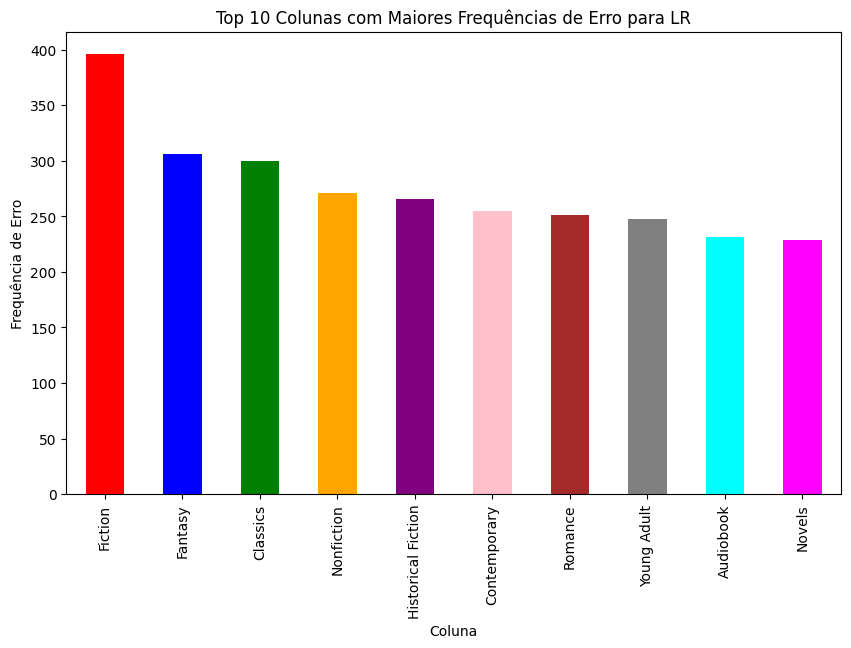

In [ ]:
# Ordenar as colunas pela frequência de erro
colunas_ordenadas = frequencia_lr.iloc[0].sort_values(ascending=False)

# Selecionar as 10 colunas com as maiores frequências de erro
top_10_colunas = colunas_ordenadas.head(10)

# Plotar apenas as 10 maiores colunas com cores diferentes
plt.figure(figsize=(10, 6))
top_10_colunas.plot(kind='bar', color=['red', 'blue', 'green', 'orange', 'purple', 'pink', 'brown', 'gray', 'cyan', 'magenta'])
plt.title("Top 10 Colunas com Maiores Frequências de Erro para LR")
plt.xlabel("Coluna")
plt.ylabel("Frequência de Erro")
plt.show()

In [45]:
# Classificador SVM

classifier = svc
clf = OneVsRestClassifier(classifier)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print_score(y_pred, classifier)
print('Hamming loss: {}'.format(metrics.hamming_loss(y_test, y_pred)))
print('Acurácia: {}'.format(metrics.accuracy_score(y_test, y_pred)))
frequencia_svc = pd.DataFrame([[0] * len(y_test.columns)], columns=nomes_colunas)
for i in range(y_test.shape[0]):
  for j in range(y_test.shape[1]):
      valor = y_test.iloc[i, j]
      valor2 = y_pred[i][j]
      if valor != valor2:
          frequencia_svc.iloc[0, j] += 1




Clf:  LinearSVC
Jacard score: 43.17619298641966
Hamming loss: 0.08177329974811083
Acurácia: 0.17884130982367757


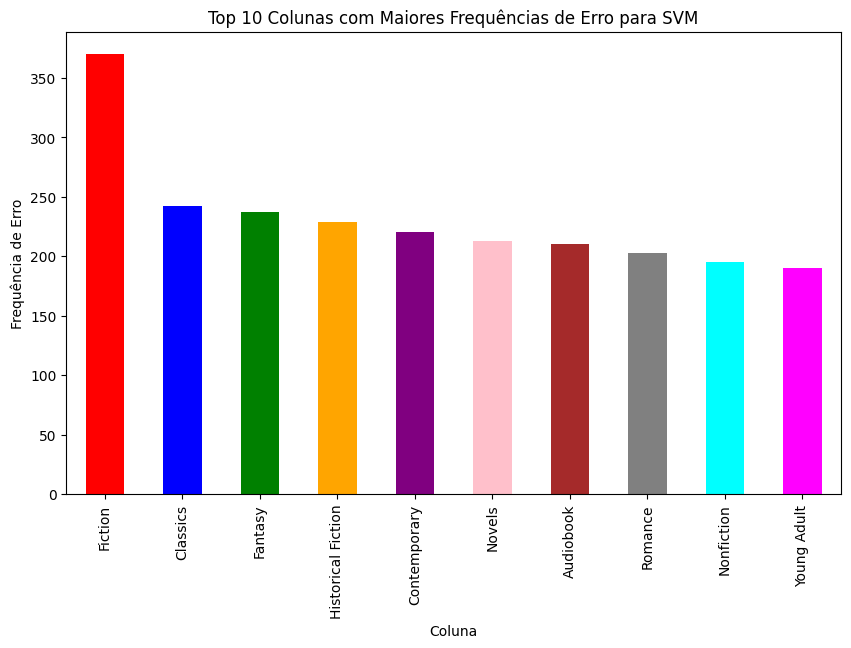

In [48]:
# Ordenar as colunas pela frequência de erro
colunas_ordenadas = frequencia_svc.iloc[0].sort_values(ascending=False)

# Selecionar as 10 colunas com as maiores frequências de erro
top_10_colunas = colunas_ordenadas.head(10)

# Plotar apenas as 10 maiores colunas com cores diferentes
plt.figure(figsize=(10, 6))
top_10_colunas.plot(kind='bar', color=['red', 'blue', 'green', 'orange', 'purple', 'pink', 'brown', 'gray', 'cyan', 'magenta'])
plt.title("Top 10 Colunas com Maiores Frequências de Erro para SVM")
plt.xlabel("Coluna")
plt.ylabel("Frequência de Erro")
plt.show()

In [ ]:
# Classificador MLkNN
# classifier = mlknn
# mlknn.fit(X_train.values, y_train.values)

# y_pred = mlknn.predict(X_test)

# print_score(y_pred, classifier)
# print('Hamming loss: {}'.format(metrics.hamming_loss(y_test, pred)))
# print('Acurácia: {}'.format(metrics.accuracy_score(y_test, pred)))

from skmultilearn.problem_transform import ClassifierChain
from sklearn.ensemble import RandomForestClassifier
cc = ClassifierChain(RandomForestClassifier())

cc.fit(X_train, y_train)

y_pred = cc.predict(X_test)


print('Hamming loss: {}'.format(metrics.hamming_loss(y_test, y_pred)))
print('Acurácia: {}'.format(metrics.accuracy_score(y_test, y_pred)))



Hamming loss: 0.11028715365239294
Acurácia: 0.0906801007556675


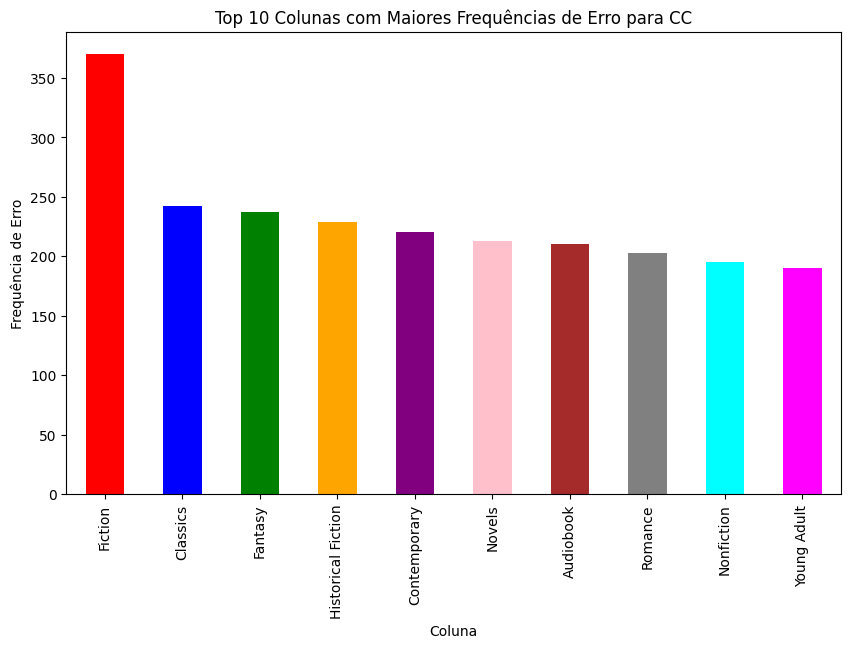

In [49]:
frequencia_svc = pd.DataFrame([[0] * len(y_test.columns)], columns=nomes_colunas)
for i in range(y_test.shape[0]):
  for j in range(y_test.shape[1]):
      valor = y_test.iloc[i, j]
      valor2 = y_pred[i][j]
      if valor != valor2:
          frequencia_svc.iloc[0, j] += 1
# Ordenar as colunas pela frequência de erro
colunas_ordenadas = frequencia_svc.iloc[0].sort_values(ascending=False)

# Selecionar as 10 colunas com as maiores frequências de erro
top_10_colunas = colunas_ordenadas.head(10)

# Plotar apenas as 10 maiores colunas com cores diferentes
plt.figure(figsize=(10, 6))
top_10_colunas.plot(kind='bar', color=['red', 'blue', 'green', 'orange', 'purple', 'pink', 'brown', 'gray', 'cyan', 'magenta'])
plt.title("Top 10 Colunas com Maiores Frequências de Erro para CC")
plt.xlabel("Coluna")
plt.ylabel("Frequência de Erro")
plt.show()

## Conclusão

Coisas a mudar
- Aumentar o Número de Features - Há muitos termos que não foram explorados. Aumentar pode significar mais cruzamentos que possibilitam melhores modelos.
- Número de classes poderia ser maior, visto que ao retirar elas, pode haver perda de informações significantes.
- Uso de Encadeamento de Classificadores, visto que o One classifier presume que todos as classes são independentes, o significa que retira todas as influências de um dado sobre outro. Um exemplo disso é o fato de Science Ficition pode estar - ou não - atrelassado a Fiction


Detalhes
- Confiança no Dataset: Ao utilizar rotulos, principalmente com interligações, um rotulo pode excluir o uso de outro por Ambiguidade.

- Os 3 maiores iguais em todos quer dizer que foi perdido alguma informação ao utilizar OneVSRest, ou não houve uma quantidade de features suficientes. Mas também a possibilidade de que é, por si só, uma falta de informação de Domínio

In [ ]:
data["Genres"].iloc[0]

"['Classics', 'Fiction', 'Historical Fiction', 'School', 'Literature', 'Young Adult', 'Historical']"

In [ ]:
type(data["Genres"].iloc[0])

str

In [ ]:
 data['Genres'] =  data['Genres'].apply(lambda x: ast.literal_eval(x))

In [ ]:
contador_palavras = Counter()

# Percorrer o array de listas
for lista in  data['Genres']:
    # Verificar se a palavra 'Fiction' está presente na lista
    if 'Fiction' in lista:
        # Atualizar o contador com as palavras da lista
        contador_palavras.update(lista)

# Exibir a frequência de ocorrência de cada palavra
print("Frequência de Palavras:")
print(contador_palavras)

Frequência de Palavras:
Counter({'Fiction': 5700, 'Fantasy': 1836, 'Classics': 1829, 'Historical Fiction': 1439, 'Young Adult': 1298, 'Mystery': 1270, 'Novels': 1144, 'Contemporary': 1112, 'Romance': 1092, 'Literature': 1051, 'Thriller': 975, 'Audiobook': 833, 'Science Fiction': 782, 'Historical': 778, 'Adventure': 668, 'Mystery Thriller': 648, 'Crime': 622, 'Childrens': 596, 'Adult': 529, 'Suspense': 485, 'Horror': 441, 'Science Fiction Fantasy': 419, 'Literary Fiction': 405, 'Middle Grade': 400, 'Humor': 373, 'Drama': 361, 'Short Stories': 309, 'Dystopia': 293, 'Magic': 272, 'American': 248, 'Paranormal': 248, 'British Literature': 231, 'Adult Fiction': 230, 'War': 223, 'School': 204, 'Poetry': 202, 'High Fantasy': 193, 'Chick Lit': 185, 'Realistic Fiction': 181, 'Philosophy': 175, 'Plays': 172, 'Animals': 146, 'Picture Books': 145, 'France': 138, 'Detective': 137, 'Epic Fantasy': 134, 'Theatre': 134, '20th Century': 130, 'Magical Realism': 129, 'LGBT': 126, 'Mythology': 118, 'New Ad

In [ ]:
contador_palavras['Fiction']


5700

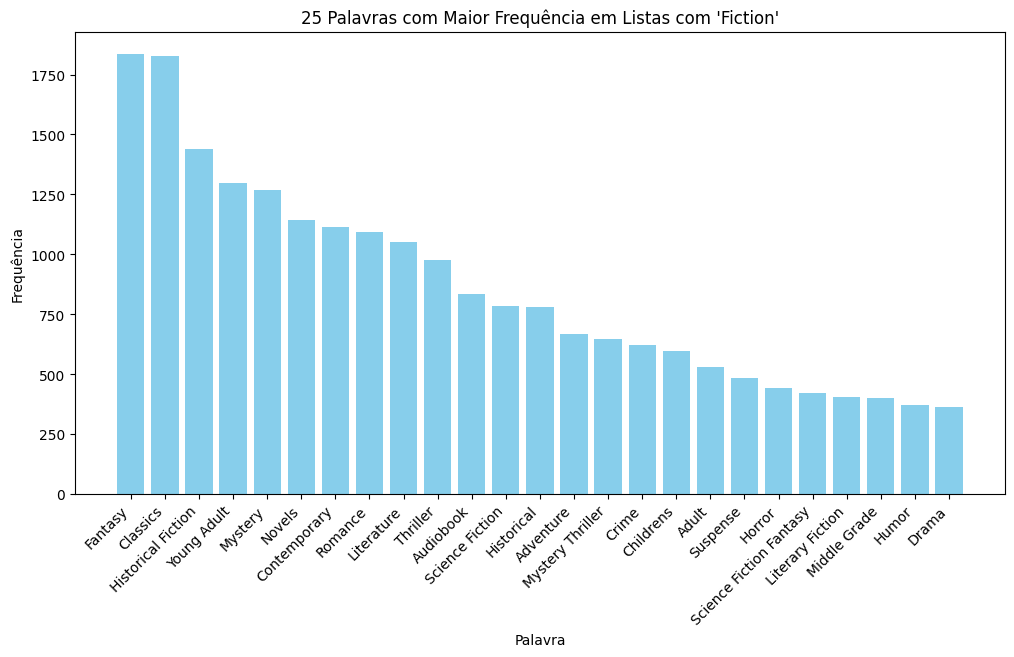

In [ ]:
# Remover a palavra 'Fiction' do contador
del contador_palavras['Fiction']

# Obter as 25 palavras mais comuns
top_25_palavras = contador_palavras.most_common(25)

# Criar um gráfico de barras com as 25 palavras mais comuns
plt.figure(figsize=(12, 6))
palavras, frequencias = zip(*top_25_palavras)
plt.bar(palavras, frequencias, color='skyblue')
plt.title("25 Palavras com Maior Frequência em Listas com 'Fiction'")
plt.xlabel("Palavra")
plt.ylabel("Frequência")
plt.xticks(rotation=45, ha='right')
plt.show()

Frequência de Palavras na Descrição de Gênero 'Fiction':
Counter({'from': 3504, 'who': 3043, 'their': 2990, 'one': 2764, 'will': 2327, 'this': 2319, 'into': 2182, 'they': 2070, 'But': 2047, 'have': 1913, 'but': 1820, 'all': 1781, 'when': 1632, 'life': 1626, 'about': 1549, 'story': 1540, 'not': 1484, 'only': 1475, 'most': 1393, 'new': 1391, 'can': 1349, 'world': 1343, 'him': 1264, 'its': 1252, 'been': 1218, 'more': 1207, 'out': 1206, 'first': 1201, 'love': 1166, 'novel': 1155, 'what': 1135, 'young': 1123, 'you': 1100, 'own': 1045, 'where': 1032, 'two': 1032, 'than': 955, 'must': 900, 'find': 899, 'man': 898, 'them': 885, 'years': 863, 'which': 838, 'just': 826, 'through': 819, 'time': 817, 'even': 804, 'family': 802, 'never': 753, 'New': 744, 'When': 727, 'between': 705, 'had': 693, 'after': 675, 'finds': 666, 'other': 657, 'like': 657, 'This': 649, 'book': 646, 'lives': 622, 'could': 615, 'way': 605, 'also': 595, 'author': 593, 'ever': 587, 'how': 583, 'before': 581, 'would': 581, 'ove

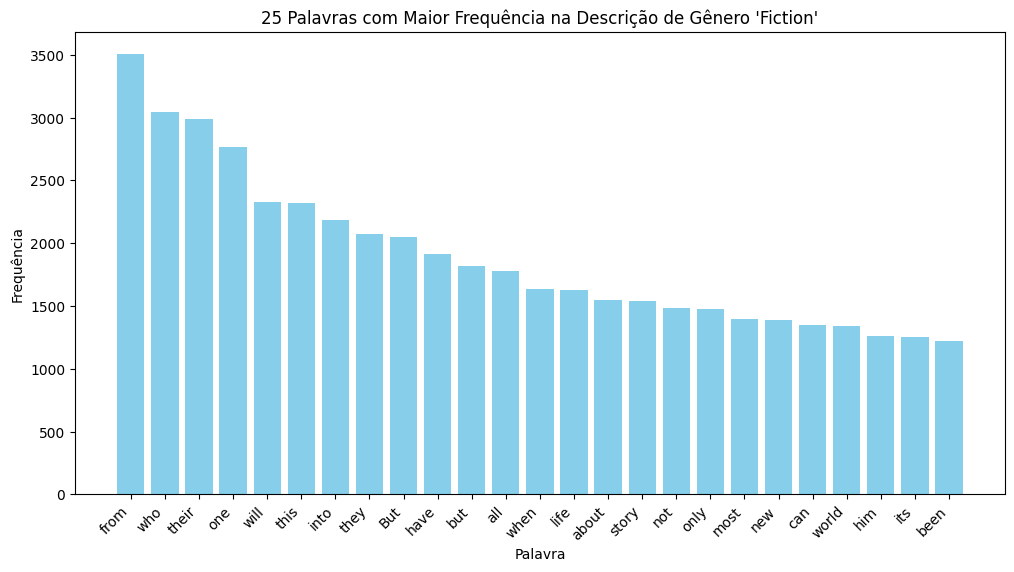

In [ ]:
df = pd.DataFrame(data)

# Filtrar as linhas onde 'Fiction' está presente na lista
df_fiction = df[df['Genres'].apply(lambda x: 'Fiction' in x)]

# Juntar as descrições em uma única string
descricao_fiction = ' '.join(str(descricao) for descricao in df_fiction['Description'] if pd.notna(descricao))


# Dividir a string em palavras
palavras_fiction = descricao_fiction.split()

# Criar uma lista de palavras a serem excluídas (verbos "to be" e artigos)
palavras_a_excluir = ['is', 'am', 'are', 'was', 'were', 'a', 'an', 'the','of','and','to','in','his','her','that','with','for','an','as','he','on','she','has']

# Filtrar palavras indesejadas e palavras com menos de 3 letras
palavras_filtradas = [palavra for palavra in palavras_fiction if palavra.lower() not in palavras_a_excluir and len(palavra) >= 3]


# Calcular a frequência de cada palavra filtrada
frequencia_palavras = Counter(palavras_filtradas)


# Exibir a frequência de cada palavra
print("Frequência de Palavras na Descrição de Gênero 'Fiction':")
print(frequencia_palavras)

# Obter as 25 palavras mais comuns
top_25_palavras = frequencia_palavras.most_common(25)

# Criar um gráfico de barras com as 25 palavras mais comuns
plt.figure(figsize=(12, 6))
palavras, frequencias = zip(*top_25_palavras)
plt.bar(palavras, frequencias, color='skyblue')
plt.title("25 Palavras com Maior Frequência na Descrição de Gênero 'Fiction'")
plt.xlabel("Palavra")
plt.ylabel("Frequência")
plt.xticks(rotation=45, ha='right')
plt.show()

Frequência de Palavras na Descrição de Todos:
Counter({'from': 6944, 'their': 5612, 'who': 5464, 'this': 5028, 'one': 4642, 'you': 4637, 'will': 4577, 'into': 4023, 'have': 4003, 'they': 3852, 'life': 3590, 'all': 3583, 'but': 3439, 'about': 3282, 'can': 3114, 'not': 3074, 'But': 2945, 'when': 2890, 'most': 2791, 'what': 2734, 'story': 2679, 'more': 2677, 'new': 2674, 'how': 2613, 'your': 2597, 'world': 2545, 'only': 2514, 'book': 2486, 'our': 2302, 'out': 2264, 'been': 2229, 'its': 2168, 'first': 2095, 'him': 2058, 'love': 2050, 'than': 2017, 'own': 1980, 'through': 1856, 'which': 1770, 'This': 1724, 'where': 1679, 'two': 1667, 'them': 1662, 'find': 1657, 'young': 1634, 'years': 1623, 'time': 1593, 'just': 1574, 'had': 1521, 'people': 1507, 'man': 1459, 'even': 1447, 'like': 1395, 'way': 1389, 'never': 1382, 'must': 1376, 'family': 1351, 'novel': 1343, 'make': 1292, 'New': 1283, 'would': 1278, 'other': 1261, 'also': 1255, 'between': 1251, 'after': 1235, 'When': 1211, 'over': 1169, 'hu

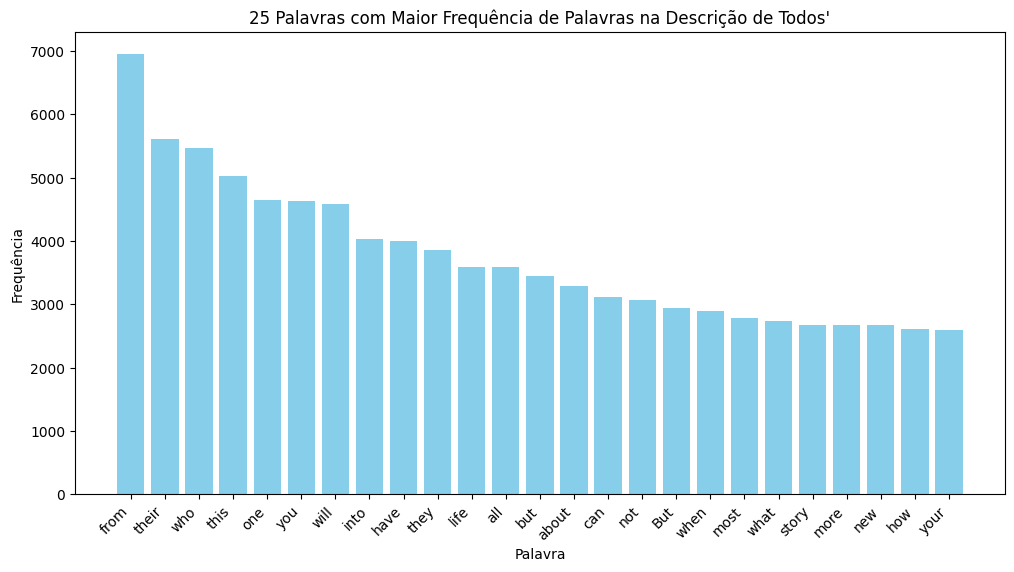

In [ ]:
# Juntar as descrições em uma única string
descricao = ' '.join(str(descricao) for descricao in df['Description'] if pd.notna(descricao))

# Dividir a string em palavras
palavras_d = descricao.split()

# Criar uma lista de palavras a serem excluídas (verbos "to be" e artigos)
palavras_d_excluir = ['is', 'am', 'are', 'was', 'were', 'a', 'an', 'the','of','and','to','in','his','her','that','with','for','an','as','he','on','she','has']

# Filtrar palavras indesejadas e palavras com menos de 3 letras
palavras_d_filtradas = [palavras for palavras in palavras_d if palavras.lower() not in palavras_d_excluir and len(palavras) >= 3]

# Calcular a frequência de cada palavra filtrada
frequencia_d_palavras = Counter(palavras_d_filtradas)

# Exibir a frequência de cada palavra
print("Frequência de Palavras na Descrição de Todos:")
print(frequencia_d_palavras)

# Obter as 25 palavras mais comuns
top_25_palavras_d = frequencia_d_palavras.most_common(25)

# Criar um gráfico de barras com as 25 palavras mais comuns
plt.figure(figsize=(12, 6))
palavrass, frequenciass = zip(*top_25_palavras_d)
plt.bar(palavrass, frequenciass, color='skyblue')
plt.title("25 Palavras com Maior Frequência de Palavras na Descrição de Todos'")
plt.xlabel("Palavra")
plt.ylabel("Frequência")
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
"""
Pode-se perceber que diante somente o Counter de Fiction, não há palavras que evidenciem muito. Isso se confirma ao perceber que as suas frequências maiores não significam muito no contexto global.
Visto que, ao calcular a relativa, não é significantemente alta.

"""

'\nPode-se perceber que diante somente o Counter de Fiction, não há palavras que evidenciem muito. Isso se confirma ao perceber que as suas frequências maiores não significam muito no contexto global.\nVisto que, ao calcular a relativa, não é significantemente alta.\n\n'

# Lixo

## Visualizar os Generos

In [ ]:
y = df["Genres"]
y

0       [Classics, Fiction, Historical Fiction, School...
1       [Fantasy, Fiction, Young Adult, Magic, Childre...
2       [Classics, Fiction, Romance, Historical Fictio...
3       [Classics, Nonfiction, History, Biography, Mem...
4       [Classics, Fiction, Dystopia, Fantasy, Politic...
                              ...                        
9995    [Dystopia, Science Fiction, Post Apocalyptic, ...
9996                                                   []
9997           [Fiction, Horror, Dystopia, Coming Of Age]
9998    [New Adult, Romance, Contemporary Romance, Con...
9999                                                   []
Name: Genres, Length: 9923, dtype: object

In [ ]:
multilabel = MultiLabelBinarizer()

In [ ]:
y = multilabel.fit_transform(df["Genres"])

In [ ]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
len(y)

9923

In [ ]:
len(y[0])

617

In [ ]:
multilabel.classes_

array(['12th Century', '15th Century', '16th Century', '17th Century',
       '18th Century', '19th Century', '20th Century', '21st Century',
       'Abuse', 'Academia', 'Academic', 'Action', 'Activism', 'Adhd',
       'Adoption', 'Adult', 'Adult Fiction', 'Adventure', 'Africa',
       'African American', 'African American Literature',
       'African Literature', 'Agriculture', 'Alchemy', 'Algeria',
       'Aliens', 'Alternate History', 'Alternate Universe', 'Amazon',
       'American', 'American Civil War', 'American History',
       'American Revolution', 'American Revolutionary War', 'Americana',
       'Amish', 'Anarchism', 'Ancient', 'Ancient History', 'Angels',
       'Animal Fiction', 'Animals', 'Anthologies', 'Anthropology',
       'Anti Racist', 'Apocalyptic', 'Archaeology', 'Architecture', 'Art',
       'Art Design', 'Art History', 'Arthurian',
       'Artificial Intelligence', 'Asexual', 'Asia', 'Asian Literature',
       'Astrology', 'Astronomy', 'Atheism', 'Audiobook', 'A

In [68]:
tfidf.vocabulary_.pop('is')
tfidf.vocabulary_.pop('am')
tfidf.vocabulary_.pop('of')
tfidf.vocabulary_.pop('the')
tfidf.vocabulary_.pop('are')
tfidf.vocabulary_.pop('was')
tfidf.vocabulary_.pop('were')
tfidf.vocabulary_.pop('a')
tfidf.vocabulary_.pop('an')
tfidf.vocabulary_.pop('and')
tfidf.vocabulary_.pop('to')
tfidf.vocabulary_.pop('in')
tfidf.vocabulary_.pop('his')
tfidf.vocabulary_.pop('her')
tfidf.vocabulary_.pop('that')
tfidf.vocabulary_.pop('with')
tfidf.vocabulary_.pop('for')
tfidf.vocabulary_.pop('as')
tfidf.vocabulary_.pop('he')
tfidf.vocabulary_.pop('she')
tfidf.vocabulary_.pop('has')


KeyError: ignored

In [69]:
tfidf.

{'unforgettable': 58641,
 'novel': 39071,
 'childhood': 10361,
 'sleepy': 51698,
 'southern': 52461,
 'town': 56994,
 'crisis': 13337,
 'conscience': 12176,
 'rocked': 48055,
 'it': 29423,
 'kill': 30967,
 'mockingbird': 36620,
 'became': 6068,
 'both': 7697,
 'instant': 28651,
 'bestseller': 6601,
 'critical': 13358,
 'success': 54073,
 'when': 61381,
 'first': 21355,
 'published': 44798,
 '1960': 487,
 'went': 61270,
 'on': 39848,
 'win': 61678,
 'pulitzer': 44848,
 'prize': 44130,
 '1961': 489,
 'later': 32018,
 'made': 33943,
 'into': 28983,
 'academy': 1382,
 'award': 5107,
 'winning': 61745,
 'film': 21188,
 'also': 2735,
 'classic': 10840,
 'compassionate': 11673,
 'dramatic': 16894,
 'deeply': 14597,
 'moving': 37254,
 'takes': 55112,
 'readers': 45907,
 'roots': 48239,
 'human': 26915,
 'behavior': 6209,
 'innocence': 28495,
 'experience': 20044,
 'kindness': 31026,
 'cruelty': 13486,
 'love': 33440,
 'hatred': 25439,
 'humor': 26974,
 'pathos': 41414,
 'now': 39108,
 'over': 

In [98]:
X.remove('an')


AttributeError: ignored